In [1]:
import warnings
import pathlib
import os
import sys
import concurrent.futures
import re

import pandas as pd

from benzinga import news_data
from datetime import datetime
from bs4 import BeautifulSoup, MarkupResemblesLocatorWarning

warnings.filterwarnings("ignore")

In [3]:
api_key = '092fe3da34ad421f99c42265ce3a7cbd'

In [4]:
df_news = pd.read_csv('../../datasets/news_sp_500.csv').iloc[:,2:][['updated', 'stocks', 'body']].dropna()

df_news['stocks'] = df_news['stocks'].apply(eval).apply(lambda x: [entry['name'] for entry in x])

df_news = df_news.explode('stocks')

df_news['updated'] = pd.to_datetime(df_news['updated']).dt.tz_localize(None)

df_news['updated'] = df_news['updated'].dt.date
df_news['updated'] = pd.to_datetime(df_news['updated'])

df_news.head()

,updated,stocks,body
0,2010-09-03,DRIV,\nIn a recent filing with the Securities and E...
0,2010-09-03,MSFT,\nIn a recent filing with the Securities and E...
1,2010-09-03,AAPL,While Google (NASDAQ: GOOG) may be a powerhous...
1,2010-09-03,GOOG,While Google (NASDAQ: GOOG) may be a powerhous...
1,2010-09-03,MSFT,While Google (NASDAQ: GOOG) may be a powerhous...


In [5]:
import pandas as pd
import numpy as np
import nltk

from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize 

import re
from string import punctuation

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sprilut/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/sprilut/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [6]:
def text_to_wordlist(text, remove_stop_words=True, stem_words=False): 
    text = text.replace('\n', '')
    text = text.replace('\r\r', '')
    text = re.sub(r"[^A-Za-z0-9]", " ", text).lower()
    text = re.sub(r'\d+', '', text)
    
    # Remove punctuation from text
    text = ''.join([c for c in text if c not in punctuation])
    
    # Optionally, remove stop words
    if remove_stop_words:
        stop_words = set(stopwords.words("english")) 
        word_tokens = word_tokenize(text) 
        text = [word for word in word_tokens if word not in stop_words] 
    
    # Optionally, shorten words to their stems
    if stem_words:
        # text = text.split()
        stemmer = SnowballStemmer('english')
        text = [stemmer.stem(word) for word in text]
    
    # Return a list of words
    return text

Merge all news of one week for every ticker in one string 

In [7]:
import ast
df_news = pd.read_csv('../../datasets/news_sp_500_embeddings.csv').iloc[:,2:][['updated', 'stocks', 'body', 'title_embeddings']].dropna()

df_news['stocks'] = df_news['stocks'].apply(eval).apply(lambda x: [entry['name'] for entry in x])
import pandas as pd

df_news['title_embeddings'] = df_news['title_embeddings'].apply(ast.literal_eval)


In [8]:
df_embedded_news = df_news.join(pd.DataFrame(df_news['title_embeddings'].tolist(), columns=[f'title_embedding_{i}' for i in range(384)]))

df_embedded_news = df_embedded_news.explode('stocks')

df_embedded_news['updated'] = pd.to_datetime(df_embedded_news['updated']).dt.date

df_embedded_news.head()

,updated,stocks,body,title_embeddings,title_embedding_0,title_embedding_1,title_embedding_2,title_embedding_3,title_embedding_4,title_embedding_5,...,title_embedding_374,title_embedding_375,title_embedding_376,title_embedding_377,title_embedding_378,title_embedding_379,title_embedding_380,title_embedding_381,title_embedding_382,title_embedding_383
0,2012-06-26,CIT,"SANTA CLARA, CA--(Marketwire - July 27, 2009) ...","[0.027524035423994064, -0.028870563954114914, ...",0.027524,-0.028871,-0.060342,0.053199,0.046198,-0.037971,...,0.036538,-0.019922,-0.055372,0.011424,-0.067690,-0.015036,0.037755,-0.089164,-0.005867,-0.016719
0,2012-06-26,CME,"SANTA CLARA, CA--(Marketwire - July 27, 2009) ...","[0.027524035423994064, -0.028870563954114914, ...",0.027524,-0.028871,-0.060342,0.053199,0.046198,-0.037971,...,0.036538,-0.019922,-0.055372,0.011424,-0.067690,-0.015036,0.037755,-0.089164,-0.005867,-0.016719
0,2012-06-26,ISRG,"SANTA CLARA, CA--(Marketwire - July 27, 2009) ...","[0.027524035423994064, -0.028870563954114914, ...",0.027524,-0.028871,-0.060342,0.053199,0.046198,-0.037971,...,0.036538,-0.019922,-0.055372,0.011424,-0.067690,-0.015036,0.037755,-0.089164,-0.005867,-0.016719
0,2012-06-26,MSFT,"SANTA CLARA, CA--(Marketwire - July 27, 2009) ...","[0.027524035423994064, -0.028870563954114914, ...",0.027524,-0.028871,-0.060342,0.053199,0.046198,-0.037971,...,0.036538,-0.019922,-0.055372,0.011424,-0.067690,-0.015036,0.037755,-0.089164,-0.005867,-0.016719
1,2012-06-26,AAPL,"ATLANTA, GA--(Marketwire - July 27, 2009) - M...","[0.021889986470341682, -0.0276284571737051, 0....",0.021890,-0.027628,0.035083,0.050099,0.067462,0.026903,...,-0.002254,-0.030781,-0.083482,-0.012103,-0.065227,0.015232,-0.005367,-0.121527,-0.053555,0.001270


In [9]:
df_news_daily = df_embedded_news.groupby(['updated', 'stocks']).agg({
    'body': '\n'.join,  # Concatenate the 'body' texts
    **{f'title_embedding_{i}': 'sum' for i in range(384)}  # Sum the embeddings
}).reset_index()

In [10]:
stocks = pd.read_csv('../../datasets/sp500_historical_data.csv')
stocks.head()

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
0,2010-01-04,A,20.154915,22.389128,22.625179,22.267525,22.453505,3815561.0
1,2010-01-05,A,19.935982,22.145924,22.331903,22.002861,22.324751,4186031.0
2,2010-01-06,A,19.865147,22.067240,22.174536,22.002861,22.067240,3243779.0
3,2010-01-07,A,19.839396,22.038628,22.045780,21.816881,22.017166,3095172.0
4,2010-01-08,A,19.832952,22.031473,22.067240,21.745352,21.917025,3733918.0


In [11]:
import pandas as pd
import pandas as pd
from ta.trend import MACD

def apply_features(group):
    group.index = pd.to_datetime(group.index)

    # Compute lag features, moving averages, etc., for the group
    for lag in range(1, 4):
        group[f'lag_{lag}'] = group['Close'].shift(lag)
    group['weekly_return'] = group['Close'].pct_change(5)
    group['5_day_MA'] = group['Close'].rolling(window=5).mean()
    group['20_day_MA'] = group['Close'].rolling(window=20).mean()
    group['5_day_volatility'] = group['Close'].rolling(window=5).std()
    group['momentum'] = group['Close'] - group['Close'].shift(1)
    
    # MACD, ensuring you handle NaNs as per your strategy

    macd = MACD(close=group['Close'], window_slow=26, window_fast=12, window_sign=9)
    group['MACD'] = macd.macd()
    group['MACD_signal'] = macd.macd_signal()
    group['MACD_histogram'] = macd.macd_diff()

    # Adjusting for multi-stock data: adding week_of_year and month
    group['week_of_year'] = group.index.isocalendar().week
    group['month'] = group.index.month
    
    return group.dropna()  # Optionally drop NaNs

# Apply the function to each group and recombine
# data_grouped = data.groupby('Symbol').apply(apply_features)


In [13]:
df_stocks = stocks.groupby('Symbol').apply(apply_features)
df_stocks.index = df_stocks.index.droplevel()
df_stocks.reset_index(inplace=True)
df_stocks['Date'] = pd.to_datetime(df_stocks['Date'])

In [17]:
df_news_daily['updated'] = pd.to_datetime(df_news_daily['updated'])

In [18]:
df_merged = df_news_daily.merge(df_stocks,
                                how='inner',
                                left_on=['updated', 'stocks'],
                                right_on=['Date', 'Symbol'])


df_merged.drop(['stocks', 'updated'], axis=1, inplace=True)
df_merged.columns = df_merged.columns.str.lower()

In [19]:
import inflect 
q = inflect.engine() 
  
def is_digit(string):
    try:
        float(string)
        return True
    except ValueError:
        return False 
        
def convert_num(text): 
    # split strings into list of texts 
    # temp_string = text.split() 
    # initialise empty list 
    new_str = [] 
  
    for word in text: 
        # if text is a digit, convert the digit 
        # to numbers and append into the new_str list 
        if is_digit(word): 
            temp = q.number_to_words(word) 
            new_str.append(temp) 
  
        # append the texts as it is 
        else: 
            new_str.append(word) 
  
    # join the texts of new_str to form a string 
    temp_str = ' '.join(new_str) 
    return temp_str 



def text_to_wordlist(text, remove_stop_words=True, stem_words=False, convert_numbers=True): 
    text = text.replace('\n', '')
    text = text.replace('\r', '')
    text = re.sub(r"[^A-Za-z0-9]", " ", text).lower()
    text = re.sub(r'\d+', '', text)
    
    # Remove punctuation from text
    text = ''.join([c for c in text if c not in punctuation])
    
    # Optionally, remove stop words
    if remove_stop_words:
        stop_words = set(stopwords.words("english")) 
        word_tokens = word_tokenize(text) 
        text = [word for word in word_tokens if word not in stop_words] 
    
    # Optionally, shorten words to their stems
    if stem_words:
        stemmer = SnowballStemmer('english')
        text = [stemmer.stem(word) for word in text]
        
    if convert_numbers:
        text = convert_num(text)
        
    # Return a list of words
    return text


In [28]:
%%time
df_merged['body_preprocessed'] = df_merged['body'].apply(lambda x: text_to_wordlist(x, stem_words=True))

CPU times: user 16min 11s, sys: 4.6 s, total: 16min 15s
Wall time: 16min 19s


In [41]:
df_merged['body_preprocessed'].iloc[2]

'vancouv british columbia marketwir aug tsx ventur companiesacro energi technolog corp art bulletin type share debtbulletin date august tsx ventur tier companytsx ventur exchang accept file compani propos toissu share deem valu per share settleoutstand debt cdn number creditor creditorth compani shall issu news releas share issu thedebt extinguish tsx x adriana resourc inc adi bulletin type miscellaneousbulletin date august tsx ventur tier companyfurth news releas date june bulletin datedseptemb respect privat placement convertibledebentur total tsx ventur exchang accept forfil subject consent balanc debentur holder anamend agreement compani one subscrib arcelormitt netherland b v term debentur theprincip amount extend one year fromseptemb septemb convers price per share extend period tsx x advanc explor inc axi bulletin type privat placement non brokeredbulletin date august tsx ventur tier companytsx ventur exchang accept file document respect toth first tranch non broker privat place

In [42]:
df_merged.to_csv('../../datasets/df_merged.csv')

In [108]:
import time

In [38]:
df_merged.drop("body", axis=1, inplace=True)

In [43]:
df_merged.head()

,title_embedding_0,title_embedding_1,title_embedding_2,title_embedding_3,title_embedding_4,title_embedding_5,title_embedding_6,title_embedding_7,title_embedding_8,title_embedding_9,...,5_day_ma,20_day_ma,5_day_volatility,momentum,macd,macd_signal,macd_histogram,week_of_year,month,body_preprocessed
0,-5.284238,-2.101056,3.551047,5.982857,1.211795,1.173621,-5.063716,4.590652,-2.697218,-1.847017,...,27.816882,28.191703,0.835555,0.236052,-0.340785,-0.256492,-0.084293,1,1,seattl wa marketwir august whitepag www whitep...
1,-0.266523,-0.147059,-0.021691,0.554440,0.150152,0.067609,0.195433,0.210850,-0.187523,-0.118193,...,20.630786,20.527071,0.228801,0.045000,0.066816,0.067156,-0.000339,1,1,atlanta ga marketwir juli market puls pleas in...
2,-0.044039,-0.024521,0.073883,0.055657,0.060926,0.043422,0.002931,-0.006896,-0.059161,0.043806,...,37.382000,36.873500,0.643638,-0.329998,0.101339,0.057419,0.043920,1,1,vancouv british columbia marketwir aug tsx ven...
3,0.002957,-0.049649,0.110712,0.019179,0.046692,0.046008,0.007282,0.045108,-0.011900,0.078266,...,29.192000,30.914000,0.498467,-0.160002,-0.756842,-0.450417,-0.306424,1,1,vancouv british columbia marketwir aug follow ...
4,-0.153213,-0.041022,0.018545,-0.009481,0.006550,-0.007050,-0.051779,0.013227,-0.099985,-0.007425,...,12.170000,12.289500,0.168671,0.170000,-0.026072,0.010217,-0.036289,1,1,toronto ontario marketwir aug editor note phot...


In [45]:
df_merged.shape

(83905, 407)

In [47]:
columns_without_embs = [col for col in df_merged.columns if 'embedding' not in col]

In [48]:
columns_without_embs

['index',
 'date',
 'symbol',
 'adj close',
 'close',
 'high',
 'low',
 'open',
 'volume',
 'lag_1',
 'lag_2',
 'lag_3',
 'weekly_return',
 '5_day_ma',
 '20_day_ma',
 '5_day_volatility',
 'momentum',
 'macd',
 'macd_signal',
 'macd_histogram',
 'week_of_year',
 'month',
 'body_preprocessed']

In [49]:
df_merged_all = df_merged.copy()
#only AAPL
df_merged = df_merged[df_merged['symbol'] == 'AAPL']

In [51]:
df_merged.head()

,title_embedding_0,title_embedding_1,title_embedding_2,title_embedding_3,title_embedding_4,title_embedding_5,title_embedding_6,title_embedding_7,title_embedding_8,title_embedding_9,...,5_day_ma,20_day_ma,5_day_volatility,momentum,macd,macd_signal,macd_histogram,week_of_year,month,body_preprocessed
1,-0.266523,-0.147059,-0.021691,0.554440,0.150152,0.067609,0.195433,0.210850,-0.187523,-0.118193,...,20.630786,20.527071,0.228801,0.045000,0.066816,0.067156,-0.000339,1,1,atlanta ga marketwir juli market puls pleas in...
86,-0.191030,-0.095999,0.357977,0.007392,0.171724,-0.001087,-0.229466,0.288756,-0.155508,0.010834,...,66.460500,62.553375,1.323044,1.315002,-0.786162,-2.024508,1.238346,1,1,view express sole author necessarili repres vi...
151,-0.057176,0.017061,0.266989,0.085347,0.098013,-0.111986,-0.015600,0.135586,0.037196,-0.052109,...,67.689499,63.113875,2.590855,3.449997,-0.167503,-1.653107,1.485604,1,1,wildest unpredict earn season mani us like eve...
223,-0.065028,-0.274084,0.283692,-0.158720,-0.029747,0.035062,0.003778,0.179657,-0.051164,-0.114389,...,68.939499,63.508500,2.382231,-0.654999,0.266860,-1.269113,1.535973,1,1,presid donald trump annnounc lengthi list grea...
362,0.132489,-0.302899,0.287633,0.206083,0.104346,-0.004171,0.084407,-0.245167,0.115395,0.099133,...,69.970499,64.008750,2.178792,0.565002,0.649202,-0.885450,1.534653,1,1,ralli today fight hand cascad fresh dismal dat...


In [90]:
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    df_merged.drop(['date', 'symbol', 'weekly_return', 'index', 'adj close', 'close', 'high', 'low', 'body_preprocessed'], axis=1),
    df_merged["weekly_return"],
    test_size=0.2,
    random_state=42
)
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('text', TfidfVectorizer(), 'body_preprocessed'),
#     ],
#     remainder='passthrough'
# )

# pipeline = Pipeline([
#     ('preprocessor', preprocessor),
# ])


# # Preprocess data
# X_train_processed = pipeline.fit_transform(X_train)
# X_test_processed = pipeline.transform(X_test)
X_test_processed = X_test
X_train_processed = X_train
# Assuming vectorizer is defined outside the snippet
def learn_model(model_class, model_params = {}):

    # Initialize and train the model
    model = model_class(**model_params)
    model.fit(X_train_processed, y_train)

    # Make predictions
    y_pred = model.predict(X_test_processed)

    # Calculate scores
    scores = {
        'mean_squared_error': mean_squared_error(y_test, y_pred),
        'mean_absolute_percentage_error': mean_absolute_percentage_error(y_test, y_pred),
        'r2': r2_score(y_test, y_pred),
    }
    print(scores)
    return model, scores


In [91]:
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split

cat_boost_model, cat_boost_scores = learn_model(CatBoostRegressor)


Learning rate set to 0.038838
0:	learn: 0.0406209	total: 22.1ms	remaining: 22.1s
1:	learn: 0.0400585	total: 42.3ms	remaining: 21.1s
2:	learn: 0.0394306	total: 55.9ms	remaining: 18.6s
3:	learn: 0.0389497	total: 68.9ms	remaining: 17.1s
4:	learn: 0.0384392	total: 82.2ms	remaining: 16.4s
5:	learn: 0.0380201	total: 95.4ms	remaining: 15.8s
6:	learn: 0.0375309	total: 109ms	remaining: 15.4s
7:	learn: 0.0370929	total: 121ms	remaining: 15s
8:	learn: 0.0366123	total: 136ms	remaining: 14.9s
9:	learn: 0.0362530	total: 149ms	remaining: 14.8s
10:	learn: 0.0358631	total: 163ms	remaining: 14.6s
11:	learn: 0.0354708	total: 176ms	remaining: 14.5s
12:	learn: 0.0350199	total: 189ms	remaining: 14.3s
13:	learn: 0.0346408	total: 202ms	remaining: 14.2s
14:	learn: 0.0342998	total: 215ms	remaining: 14.1s
15:	learn: 0.0338855	total: 231ms	remaining: 14.2s
16:	learn: 0.0335616	total: 245ms	remaining: 14.1s
17:	learn: 0.0332180	total: 259ms	remaining: 14.1s
18:	learn: 0.0328494	total: 272ms	remaining: 14.1s
19:	lea

In [92]:
# lightgbm
from lightgbm import LGBMRegressor
lightgbm_model, lightgbm_scores = learn_model(LGBMRegressor)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004771 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 94669
[LightGBM] [Info] Number of data points in the train set: 716, number of used features: 396
[LightGBM] [Info] Start training from score 0.007049
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

In [93]:
# xgboost
from xgboost import XGBRegressor
xgboost_model, xgboost_scores = learn_model(XGBRegressor)

{'mean_squared_error': 0.0005936568419132405, 'mean_absolute_percentage_error': 4.089817983240395, 'r2': 0.6294163069849105}


In [94]:
# gradient boosting
from sklearn.ensemble import GradientBoostingRegressor
gradient_boosting_model, gradient_boosting_scores = learn_model(GradientBoostingRegressor)

{'mean_squared_error': 0.0005184958708241682, 'mean_absolute_percentage_error': 4.071133410658578, 'r2': 0.6763347087791569}


In [95]:
# random forest
from sklearn.ensemble import RandomForestRegressor
random_forest_model, random_forest_scores = learn_model(RandomForestRegressor)

{'mean_squared_error': 0.0005305346413932836, 'mean_absolute_percentage_error': 4.00147142512761, 'r2': 0.6688196399011733}


In [96]:
# decision forest
from sklearn.tree import DecisionTreeRegressor
decision_tree_model, decision_tree_scores = learn_model(DecisionTreeRegressor)

{'mean_squared_error': 0.001027938102348114, 'mean_absolute_percentage_error': 4.916758787445624, 'r2': 0.3583210513814664}


In [97]:
# bagging
from sklearn.ensemble import BaggingRegressor
bagging_model, bagging_scores = learn_model(BaggingRegressor)

{'mean_squared_error': 0.0005732558934724939, 'mean_absolute_percentage_error': 5.328465208393845, 'r2': 0.6421513725655867}


ValueError: not enough values to unpack (expected 3, got 2)

cat_boost


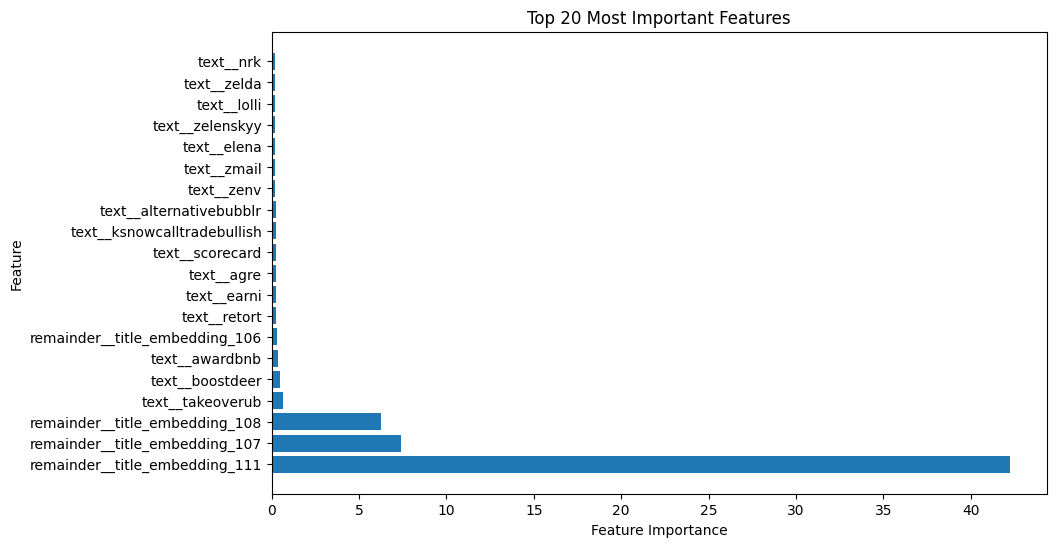

lightgbm


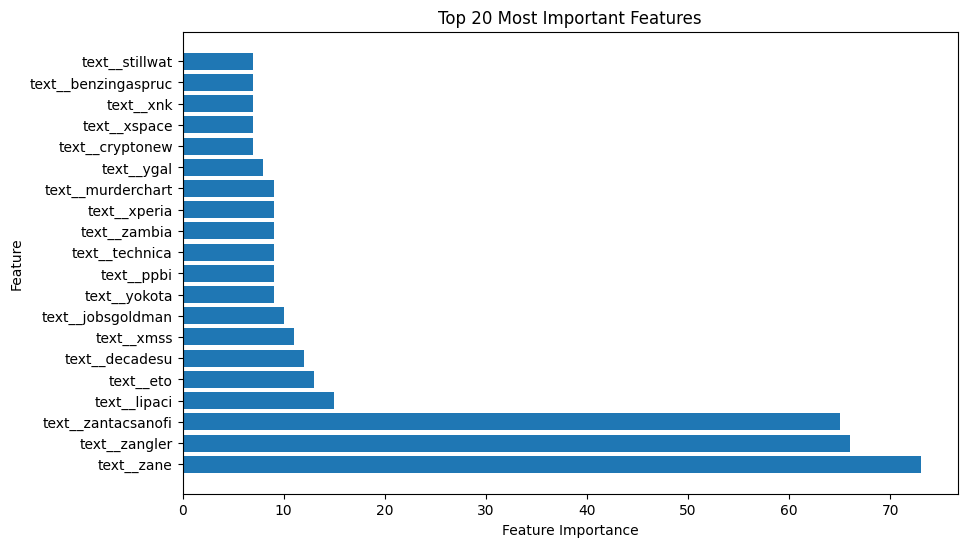

gradient_boosting


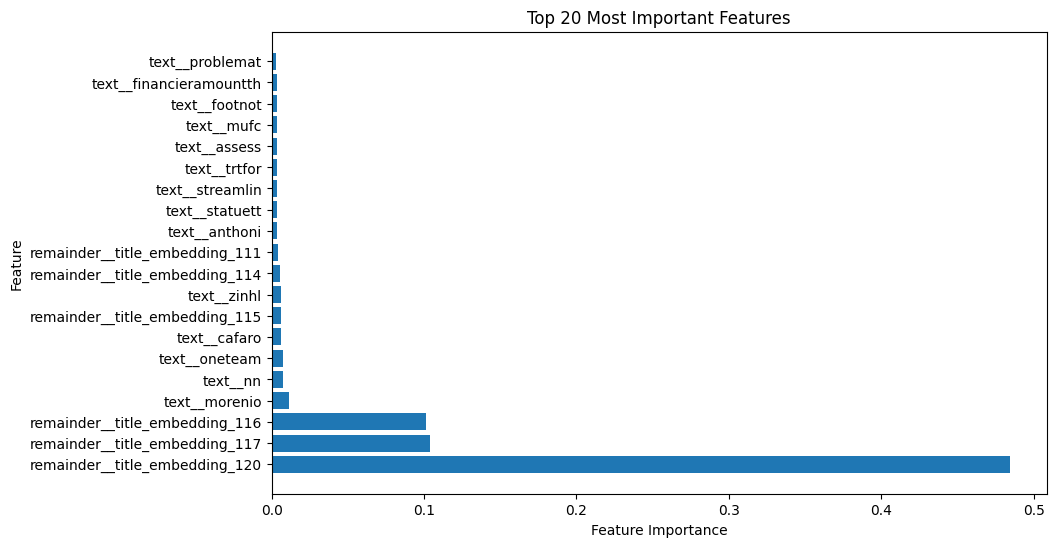

random_forest


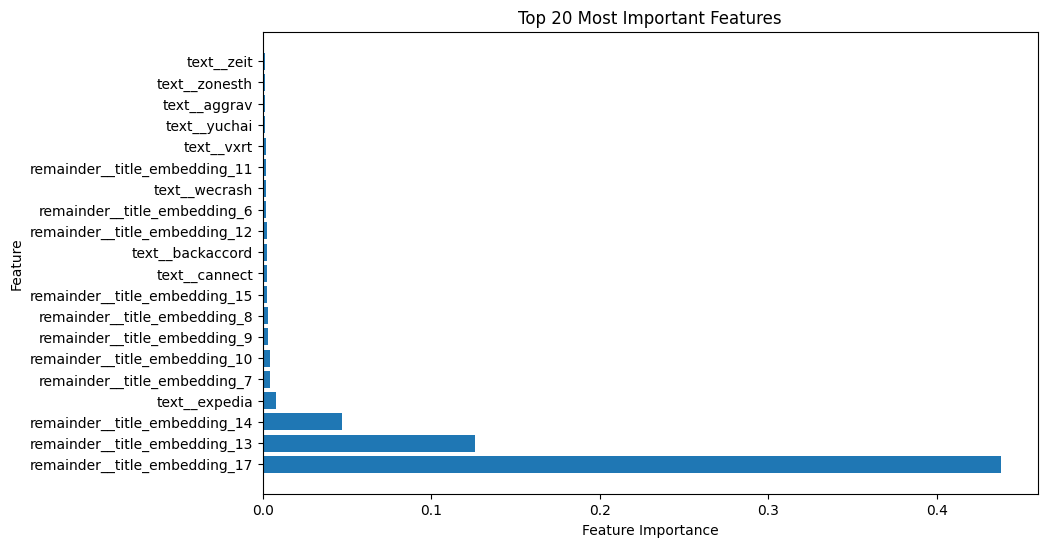

bagging


AttributeError: 'BaggingRegressor' object has no attribute 'feature_importances_'

In [ ]:
import matplotlib.pyplot as plt

def show_feature_imporatnce(model, pipeline):
    # Get feature importances
    feature_importances = model.feature_importances_

    # Get the indices of the top 20 most important features
    top_20_indices = feature_importances.argsort()[-20:][::-1]

    # Get the names of the top 20 most important features
    top_20_features = pipeline.get_feature_names_out()[top_20_indices]

    # Plot the feature importances
    plt.figure(figsize=(10, 6))
    plt.barh(range(len(top_20_features)), feature_importances[top_20_indices], align='center')
    plt.yticks(range(len(top_20_features)), top_20_features)
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')
    plt.title('Top 20 Most Important Features')
    plt.show()
models = {
    'cat_boost': cat_boost_model,
    'lightgbm': lightgbm_model,
    'gradient_boosting': gradient_boosting_model,
    'random_forest': random_forest_model,
    'bagging': bagging_model,
}
for model_name, model in models.items():
    print(model_name)
    show_feature_imporatnce(model, pipeline)


In [118]:
import optuna
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

def objective(trial, model_name):
    if model_name == 'CatBoostRegressor':
        param = {
            'iterations': trial.suggest_int('iterations', 50, 300),
            'depth': trial.suggest_int('depth', 4, 10),
            'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
            'random_strength': trial.suggest_int('random_strength', 0, 100),
            'bagging_temperature': trial.suggest_loguniform('bagging_temperature', 0.01, 100.00),
            'od_type': trial.suggest_categorical('od_type', ['IncToDec', 'Iter']),
        }
        model = CatBoostRegressor(**param, verbose=0)
        
    elif model_name == 'LGBMRegressor':
        param = {
            'num_leaves': trial.suggest_int('num_leaves', 31, 256),
            'max_depth': trial.suggest_int('max_depth', -1, 50),
            'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
            'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
            'verbose': -1
        }
        model = LGBMRegressor(**param)
        
    elif model_name == 'XGBRegressor':
        param = {
            'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
            'max_depth': trial.suggest_int('max_depth', 3, 9),
            'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
            'subsample': trial.suggest_discrete_uniform('subsample', 0.5, 1, 0.1),
            'colsample_bytree': trial.suggest_discrete_uniform('colsample_bytree', 0.5, 1, 0.1)
        }
        model = XGBRegressor(**param)
        
    elif model_name == 'GradientBoostingRegressor':
        param = {
            'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
            'max_depth': trial.suggest_int('max_depth', 3, 9),
            'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
            'subsample': trial.suggest_discrete_uniform('subsample', 0.5, 1, 0.1)
        }
        model = GradientBoostingRegressor(**param)
        
    elif model_name == 'RandomForestRegressor':
        param = {
            'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
            'max_depth': trial.suggest_int('max_depth', 5, 30),
            'min_samples_split': trial.suggest_int('min_samples_split', 2, 14),
            'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 8)
        }
        model = RandomForestRegressor(**param)
        
    elif model_name == 'DecisionTreeRegressor':
        param = {
            'max_depth': trial.suggest_int('max_depth', 5, 30),
            'min_samples_split': trial.suggest_int('min_samples_split', 2, 14),
            'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 8)
        }
        model = DecisionTreeRegressor(**param)
        
    elif model_name == 'BaggingRegressor':
        param = {
            'n_estimators': trial.suggest_int('n_estimators', 10, 100),
            'max_samples': trial.suggest_float('max_samples', 0.5, 1.0),
            'max_features': trial.suggest_float('max_features', 0.5, 1.0)
        }
        model = BaggingRegressor(**param)

    model.fit(X_train_processed, y_train)
    preds = model.predict(X_test_processed)
    r2 = r2_score(y_test, preds)
    return r2

def tune_model(model_name, n_trials=100):
    study = optuna.create_study(direction='maximize')
    study.optimize(lambda trial: objective(trial, model_name), n_trials=n_trials)
    print(f"Best parameters for {model_name}: {study.best_params}")
    print(f"Best r2-score for {model_name}: {study.best_value}")
    
    return study.best_params

In [119]:
best_params_catboost = tune_model('CatBoostRegressor')

[I 2024-03-04 00:05:17,349] A new study created in memory with name: no-name-81fba15c-9c85-4e31-a4b1-a554b9f7089b


[I 2024-03-04 00:05:26,235] Trial 0 finished with value: 0.0416929820927634 and parameters: {'iterations': 70, 'depth': 10, 'learning_rate': 0.03111256635566312, 'random_strength': 70, 'bagging_temperature': 0.034660165846626824, 'od_type': 'IncToDec'}. Best is trial 0 with value: 0.0416929820927634.
[I 2024-03-04 00:05:29,586] Trial 1 finished with value: 0.4989377369664493 and parameters: {'iterations': 77, 'depth': 8, 'learning_rate': 0.11623185297936225, 'random_strength': 6, 'bagging_temperature': 0.03505852428529724, 'od_type': 'IncToDec'}. Best is trial 1 with value: 0.4989377369664493.
[I 2024-03-04 00:05:37,879] Trial 2 finished with value: 0.2897557389483266 and parameters: {'iterations': 104, 'depth': 9, 'learning_rate': 0.12632634363582776, 'random_strength': 75, 'bagging_temperature': 89.55075040638232, 'od_type': 'Iter'}. Best is trial 1 with value: 0.4989377369664493.
[I 2024-03-04 00:05:54,034] Trial 3 finished with value: 0.0853463690530939 and parameters: {'iterations

Best parameters for CatBoostRegressor: {'iterations': 243, 'depth': 4, 'learning_rate': 0.07987550620256205, 'random_strength': 41, 'bagging_temperature': 0.621103376953346, 'od_type': 'Iter'}
Best r2-score for CatBoostRegressor: 0.6561925658488306


In [120]:
best_params_lgbm = tune_model('LGBMRegressor')

[I 2024-03-04 00:10:54,393] A new study created in memory with name: no-name-b60744a9-1794-458a-bfee-3774d59e0ac5
[I 2024-03-04 00:10:57,803] Trial 0 finished with value: 0.651807387519518 and parameters: {'num_leaves': 180, 'max_depth': 50, 'learning_rate': 0.02120012358114403, 'n_estimators': 545}. Best is trial 0 with value: 0.651807387519518.
[I 2024-03-04 00:10:58,926] Trial 1 finished with value: 0.6554962459040945 and parameters: {'num_leaves': 205, 'max_depth': 29, 'learning_rate': 0.02788628538754098, 'n_estimators': 185}. Best is trial 1 with value: 0.6554962459040945.
[I 2024-03-04 00:11:04,059] Trial 2 finished with value: 0.6482574193077084 and parameters: {'num_leaves': 123, 'max_depth': 49, 'learning_rate': 0.01937976184288885, 'n_estimators': 833}. Best is trial 1 with value: 0.6554962459040945.
[I 2024-03-04 00:11:09,965] Trial 3 finished with value: 0.6511174855919253 and parameters: {'num_leaves': 137, 'max_depth': 46, 'learning_rate': 0.05930005913410416, 'n_estimat

Best parameters for LGBMRegressor: {'num_leaves': 63, 'max_depth': 4, 'learning_rate': 0.011310265624044778, 'n_estimators': 849}
Best r2-score for LGBMRegressor: 0.681235362643198


In [121]:
best_params_xgboost = tune_model('XGBRegressor')

[I 2024-03-04 00:15:09,164] A new study created in memory with name: no-name-c02eb173-046c-4aca-a58d-bd96fcc9fe54
[I 2024-03-04 00:15:11,649] Trial 0 finished with value: 0.6621286853502478 and parameters: {'n_estimators': 428, 'max_depth': 6, 'learning_rate': 0.07152021959291412, 'subsample': 1.0, 'colsample_bytree': 0.5}. Best is trial 0 with value: 0.6621286853502478.
[I 2024-03-04 00:15:13,515] Trial 1 finished with value: 0.6551023789909441 and parameters: {'n_estimators': 729, 'max_depth': 4, 'learning_rate': 0.15061921847687107, 'subsample': 0.9, 'colsample_bytree': 0.6}. Best is trial 0 with value: 0.6621286853502478.
[I 2024-03-04 00:15:14,335] Trial 2 finished with value: 0.6300407629854088 and parameters: {'n_estimators': 152, 'max_depth': 4, 'learning_rate': 0.15551829288197028, 'subsample': 0.7, 'colsample_bytree': 0.5}. Best is trial 0 with value: 0.6621286853502478.
[I 2024-03-04 00:15:17,270] Trial 3 finished with value: 0.6733941192941675 and parameters: {'n_estimators

Best parameters for XGBRegressor: {'n_estimators': 662, 'max_depth': 6, 'learning_rate': 0.022751036471352574, 'subsample': 0.7, 'colsample_bytree': 1.0}
Best r2-score for XGBRegressor: 0.7033394253820171


In [122]:
best_params_regression = tune_model('GradientBoostingRegressor')

[I 2024-03-04 00:23:00,569] A new study created in memory with name: no-name-c9da32b0-1376-40f2-ab71-ebf8a6216518
[I 2024-03-04 00:23:55,748] Trial 0 finished with value: 0.6937908339082456 and parameters: {'n_estimators': 517, 'max_depth': 8, 'learning_rate': 0.012291842952294322, 'subsample': 0.8}. Best is trial 0 with value: 0.6937908339082456.
[I 2024-03-04 00:25:15,694] Trial 1 finished with value: 0.6839802273619169 and parameters: {'n_estimators': 842, 'max_depth': 5, 'learning_rate': 0.049358503303742696, 'subsample': 1.0}. Best is trial 0 with value: 0.6937908339082456.
[I 2024-03-04 00:25:26,619] Trial 2 finished with value: 0.6927188288359557 and parameters: {'n_estimators': 274, 'max_depth': 3, 'learning_rate': 0.05644996228127995, 'subsample': 0.7}. Best is trial 0 with value: 0.6937908339082456.
[I 2024-03-04 00:25:52,623] Trial 3 finished with value: 0.6216934988257459 and parameters: {'n_estimators': 653, 'max_depth': 3, 'learning_rate': 0.22780613495006719, 'subsample'

Best parameters for GradientBoostingRegressor: {'n_estimators': 277, 'max_depth': 9, 'learning_rate': 0.030116927907760483, 'subsample': 0.6}
Best r2-score for GradientBoostingRegressor: 0.7133228845383104


In [123]:
best_params_bagging = tune_model('BaggingRegressor')

[I 2024-03-04 01:17:07,717] A new study created in memory with name: no-name-8dbc1c61-05b6-4390-8cc2-555a84abc468
[I 2024-03-04 01:17:09,647] Trial 0 finished with value: 0.6460036629534226 and parameters: {'n_estimators': 27, 'max_samples': 0.729837480524972, 'max_features': 0.8794206769304906}. Best is trial 0 with value: 0.6460036629534226.
[I 2024-03-04 01:17:10,670] Trial 1 finished with value: 0.6518334763320093 and parameters: {'n_estimators': 11, 'max_samples': 0.9116407155551942, 'max_features': 0.9880086632559602}. Best is trial 1 with value: 0.6518334763320093.
[I 2024-03-04 01:17:11,301] Trial 2 finished with value: 0.549689940580571 and parameters: {'n_estimators': 12, 'max_samples': 0.5623957627948939, 'max_features': 0.7860843179376982}. Best is trial 1 with value: 0.6518334763320093.
[I 2024-03-04 01:17:14,820] Trial 3 finished with value: 0.6300319943790771 and parameters: {'n_estimators': 51, 'max_samples': 0.7003744011110516, 'max_features': 0.8907488280866304}. Best

Best parameters for BaggingRegressor: {'n_estimators': 59, 'max_samples': 0.8887347767071121, 'max_features': 0.9719486892742526}
Best r2-score for BaggingRegressor: 0.6966003953298434


In [124]:
best_params_dt = tune_model('DecisionTreeRegressor')

[I 2024-03-04 01:25:56,331] A new study created in memory with name: no-name-fef839cb-93b1-463e-9643-a34caf2d4d78
[I 2024-03-04 01:25:56,471] Trial 0 finished with value: 0.42205968308820885 and parameters: {'max_depth': 15, 'min_samples_split': 5, 'min_samples_leaf': 5}. Best is trial 0 with value: 0.42205968308820885.
[I 2024-03-04 01:25:56,584] Trial 1 finished with value: 0.4571292741764196 and parameters: {'max_depth': 7, 'min_samples_split': 2, 'min_samples_leaf': 6}. Best is trial 1 with value: 0.4571292741764196.
[I 2024-03-04 01:25:56,721] Trial 2 finished with value: 0.4245992476317204 and parameters: {'max_depth': 22, 'min_samples_split': 2, 'min_samples_leaf': 5}. Best is trial 1 with value: 0.4571292741764196.
[I 2024-03-04 01:25:56,863] Trial 3 finished with value: 0.46936604684544336 and parameters: {'max_depth': 17, 'min_samples_split': 7, 'min_samples_leaf': 4}. Best is trial 3 with value: 0.46936604684544336.
[I 2024-03-04 01:25:57,003] Trial 4 finished with value: 0.

Best parameters for DecisionTreeRegressor: {'max_depth': 5, 'min_samples_split': 7, 'min_samples_leaf': 3}
Best r2-score for DecisionTreeRegressor: 0.6175517156661718
